# Situation

You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

# Task - Create a report that covers the following:

1) What time of the year do major accidents occur

2) What time of day and day of the week do most major incidents happen?

2) Are there any patterns in the time of day/ day of the week when major incidents occur?

3) Do external factors effect the occurence of major incidents?

4) On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accidents=pd.read_csv('Accidents.csv')
accidents

/var/folders/mv/2r7940dx1xq7bhnl13rb8k2r0000gn/T/ipykernel_7204/3106217468.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents=pd.read_csv('Accidents.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,10001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,10009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,10009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,10009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,10009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562434,2021991196247,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,...,0,1,1,1,0,0,1,1,-1,-1
562435,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,...,0,6,1,1,0,0,2,1,-1,-1
562436,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,...,0,1,1,1,0,0,2,1,-1,-1
562437,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,...,5,1,9,1,0,0,1,2,-1,-1


In [3]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [4]:
accidents_1=accidents.drop(['accident_index','location_easting_osgr','location_northing_osgr','police_force',
               'local_authority_district', 'local_authority_ons_district','local_authority_highway',
               'local_authority_highway','did_police_officer_attend_scene_of_accident','trunk_road_flag', 
               'lsoa_of_accident_location'],axis=1)

accidents_1.columns

Index(['accident_year', 'accident_reference', 'longitude', 'latitude',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area'],
      dtype='object')

In [5]:
#Checking null values
accidents_1.isna().sum()

accident_year                                0
accident_reference                           0
longitude                                  143
latitude                                   143
accident_severity                            0
number_of_vehicles                           0
number_of_casualties                         0
date                                         0
day_of_week                                  0
time                                         0
first_road_class                             0
first_road_number                            0
road_type                                    0
speed_limit                                  0
junction_detail                              0
junction_control                             0
second_road_class                            0
second_road_number                           0
pedestrian_crossing_human_control            0
pedestrian_crossing_physical_facilities      0
light_conditions                             0
weather_condi

In [6]:
accidents_1.dtypes

accident_year                                int64
accident_reference                          object
longitude                                  float64
latitude                                   float64
accident_severity                            int64
number_of_vehicles                           int64
number_of_casualties                         int64
date                                        object
day_of_week                                  int64
time                                        object
first_road_class                             int64
first_road_number                            int64
road_type                                    int64
speed_limit                                  int64
junction_detail                              int64
junction_control                             int64
second_road_class                            int64
second_road_number                           int64
pedestrian_crossing_human_control            int64
pedestrian_crossing_physical_fa

In [7]:
# Split date into day, month, and year columns
accidents_1[['day', 'month', 'year']] = accidents_1['date'].str.split('/', expand=True)

# Drop the accident_year column
accidents_1.drop('accident_year', axis=1, inplace=True)

# Return the modified dataframe
accidents_1

,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day,month,year
0,10001708,-0.080107,51.650061,1,2,3,05/08/2017,7,03:12,3,...,0,4,1,1,0,0,1,05,08,2017
1,10009342,-0.173845,51.522425,3,2,1,01/01/2017,1,01:30,3,...,0,4,1,2,0,0,1,01,01,2017
2,10009344,-0.052969,51.514096,3,3,1,01/01/2017,1,00:30,3,...,0,4,1,1,0,0,1,01,01,2017
3,10009348,-0.060658,51.624832,3,2,1,01/01/2017,1,01:11,3,...,4,4,2,2,0,0,1,01,01,2017
4,10009350,-0.072372,51.573408,2,1,1,01/01/2017,1,01:42,3,...,5,4,1,2,0,0,1,01,01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562434,991196247,-3.194076,55.958152,3,2,1,22/09/2021,4,09:05,6,...,0,1,1,1,0,0,1,22,09,2021
562435,991196607,-4.010304,54.902512,3,2,2,11/09/2021,7,21:15,3,...,0,6,1,1,0,0,2,11,09,2021
562436,991197944,-2.716825,57.634805,3,1,1,17/04/2021,7,14:30,4,...,0,1,1,1,0,0,2,17,04,2021
562437,991200639,-3.172192,55.970735,3,1,1,17/09/2021,6,17:00,3,...,5,1,9,1,0,0,1,17,09,2021


In [8]:
# Convert 'time' column to datetime format and extract the hour component
accidents_1['time'] = pd.to_datetime(accidents_1['time']).dt.hour

In [10]:
days_of_week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
accidents_1['day_of_week'] = accidents_1['day_of_week'].astype('int').apply(lambda x: days_of_week[x-1])
accidents_1['month'] = [months[int(x)-1] for x in accidents_1['month']]
accidents_1

,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day,month,year
0,10001708,-0.080107,51.650061,1,2,3,05/08/2017,Sat,3,3,...,0,4,1,1,0,0,1,05,Aug,2017
1,10009342,-0.173845,51.522425,3,2,1,01/01/2017,Sun,1,3,...,0,4,1,2,0,0,1,01,Jan,2017
2,10009344,-0.052969,51.514096,3,3,1,01/01/2017,Sun,0,3,...,0,4,1,1,0,0,1,01,Jan,2017
3,10009348,-0.060658,51.624832,3,2,1,01/01/2017,Sun,1,3,...,4,4,2,2,0,0,1,01,Jan,2017
4,10009350,-0.072372,51.573408,2,1,1,01/01/2017,Sun,1,3,...,5,4,1,2,0,0,1,01,Jan,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562434,991196247,-3.194076,55.958152,3,2,1,22/09/2021,Wed,9,6,...,0,1,1,1,0,0,1,22,Sept,2021
562435,991196607,-4.010304,54.902512,3,2,2,11/09/2021,Sat,21,3,...,0,6,1,1,0,0,2,11,Sept,2021
562436,991197944,-2.716825,57.634805,3,1,1,17/04/2021,Sat,14,4,...,0,1,1,1,0,0,2,17,Apr,2021
562437,991200639,-3.172192,55.970735,3,1,1,17/09/2021,Fri,17,3,...,5,1,9,1,0,0,1,17,Sept,2021


In [11]:
# Define a list of accident severity codes in the same order as the convert dictionary
severity_codes={'1':'Fatal','2':'Serious','3':'Slight'}
accidents_1['accident_severity']=accidents_1['accident_severity'].astype('string').map(severity_codes)

# Classify accidents as 'major' or 'non-major' using vectorized operations
accidents_1['incident_type'] = np.where((accidents_1['accident_severity'] == 'Fatal') & (accidents_1['number_of_casualties'] >= 3),
                                        'major',
                                        'non-major')

# Return the modified dataframe
accidents_1

,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day,month,year,incident_type
0,10001708,-0.080107,51.650061,Fatal,2,3,05/08/2017,Sat,3,3,...,4,1,1,0,0,1,05,Aug,2017,major
1,10009342,-0.173845,51.522425,Slight,2,1,01/01/2017,Sun,1,3,...,4,1,2,0,0,1,01,Jan,2017,non-major
2,10009344,-0.052969,51.514096,Slight,3,1,01/01/2017,Sun,0,3,...,4,1,1,0,0,1,01,Jan,2017,non-major
3,10009348,-0.060658,51.624832,Slight,2,1,01/01/2017,Sun,1,3,...,4,2,2,0,0,1,01,Jan,2017,non-major
4,10009350,-0.072372,51.573408,Serious,1,1,01/01/2017,Sun,1,3,...,4,1,2,0,0,1,01,Jan,2017,non-major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562434,991196247,-3.194076,55.958152,Slight,2,1,22/09/2021,Wed,9,6,...,1,1,1,0,0,1,22,Sept,2021,non-major
562435,991196607,-4.010304,54.902512,Slight,2,2,11/09/2021,Sat,21,3,...,6,1,1,0,0,2,11,Sept,2021,non-major
562436,991197944,-2.716825,57.634805,Slight,1,1,17/04/2021,Sat,14,4,...,1,1,1,0,0,2,17,Apr,2021,non-major
562437,991200639,-3.172192,55.970735,Slight,1,1,17/09/2021,Fri,17,3,...,1,9,1,0,0,1,17,Sept,2021,non-major


In [12]:
accidents_type = accidents_1.groupby(['year', 'incident_type']).size()
accidents_type

year  incident_type
2017  major               278
      non-major        129704
2018  major               270
      non-major        122365
2019  major               275
      non-major        117261
2020  major               202
      non-major         90997
2021  major               234
      non-major        100853
dtype: int64

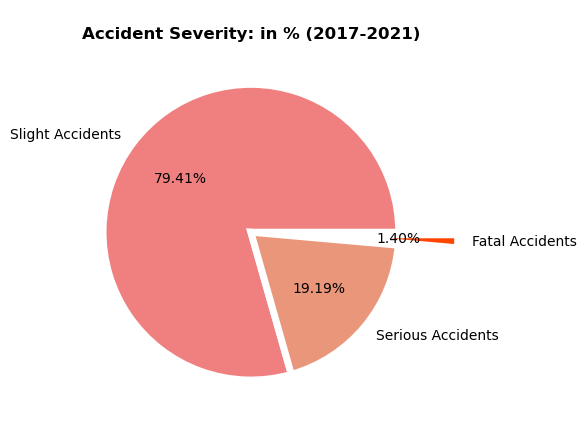

In [13]:
counts = accidents_1['accident_severity'].value_counts()
slight = counts['Slight']
serious = counts['Serious']
fatal = counts['Fatal']

y = ['Slight Accidents', 'Serious Accidents', 'Fatal Accidents']
x = [slight, serious, fatal]
colors = ['lightcoral', 'darksalmon', 'orangered']
explode = (0, 0, 0.4)

plt.pie(x=x, explode=explode, labels=y, colors=colors, 
        autopct='%1.2f%%', wedgeprops={'linewidth':5, 'edgecolor':'white'})

plt.title('\nAccident Severity: in % (2017-2021)', fontsize=12, fontweight='bold')
plt.show();

[Text(0.5, 0, '\nYear')]

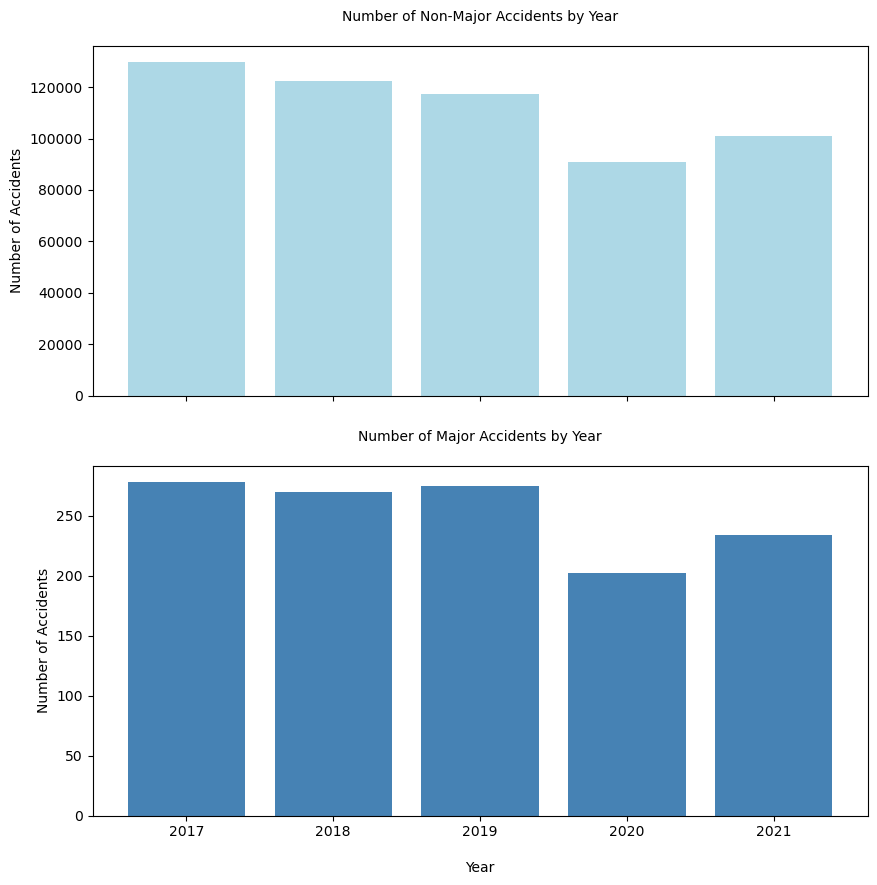

In [14]:
import matplotlib.cm as cm

accidents_yearly = accidents_1.groupby(['year', 'incident_type']).size().unstack(fill_value=0)

labels = ['2017', '2018', '2019', '2020', '2021']
colors = cm.get_cmap('Blues')(np.linspace(0.2, 0.8, 2))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.bar(accidents_yearly.index, accidents_yearly['non-major'], color='lightblue')
ax2.bar(accidents_yearly.index, accidents_yearly['major'], color='steelblue')
plt.xticks(accidents_yearly.index, labels)
ax1.set_title('Number of Non-Major Accidents by Year\n', fontsize=10)
ax2.set_title('Number of Major Accidents by Year\n', fontsize=10)
ax1.set(ylabel='Number of Accidents')
ax2.set(ylabel='Number of Accidents')
ax2.set(xlabel='\nYear')


[Text(0.5, 0, '\nMonth')]

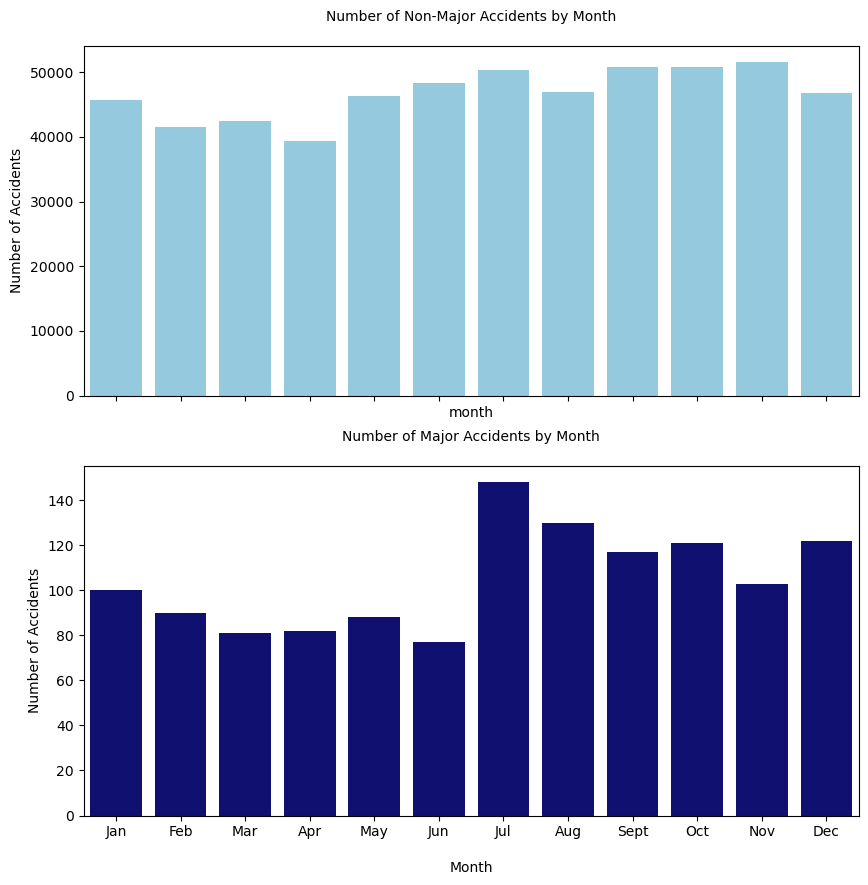

In [15]:
import seaborn as sns

accidents_major=accidents_1[accidents_1['incident_type']=='major']
accidents_nonmajor=accidents_1[accidents_1['incident_type']=='non-major']
form=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sept','Oct','Nov','Dec']
fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(10,10), sharex=True)

accidents_nonmajor_monthly=accidents_nonmajor.groupby('month').size().reindex(form)
accidents_major_monthly=accidents_major.groupby('month').size().reindex(form)

# plot
sns.barplot(x=accidents_nonmajor_monthly.index, y=accidents_nonmajor_monthly.values, color='skyblue', ax=ax1)
sns.barplot(x=accidents_major_monthly.index, y=accidents_major_monthly.values, color='navy', ax=ax2)

ax1.set_title('Number of Non-Major Accidents by Month\n', fontsize=10)
ax2.set_title('Number of Major Accidents by Month\n', fontsize=10)
ax1.set(ylabel='Number of Accidents')
ax2.set(ylabel='Number of Accidents')
ax2.set(xlabel='\nMonth')


[Text(0.5, 0, '\nYear')]

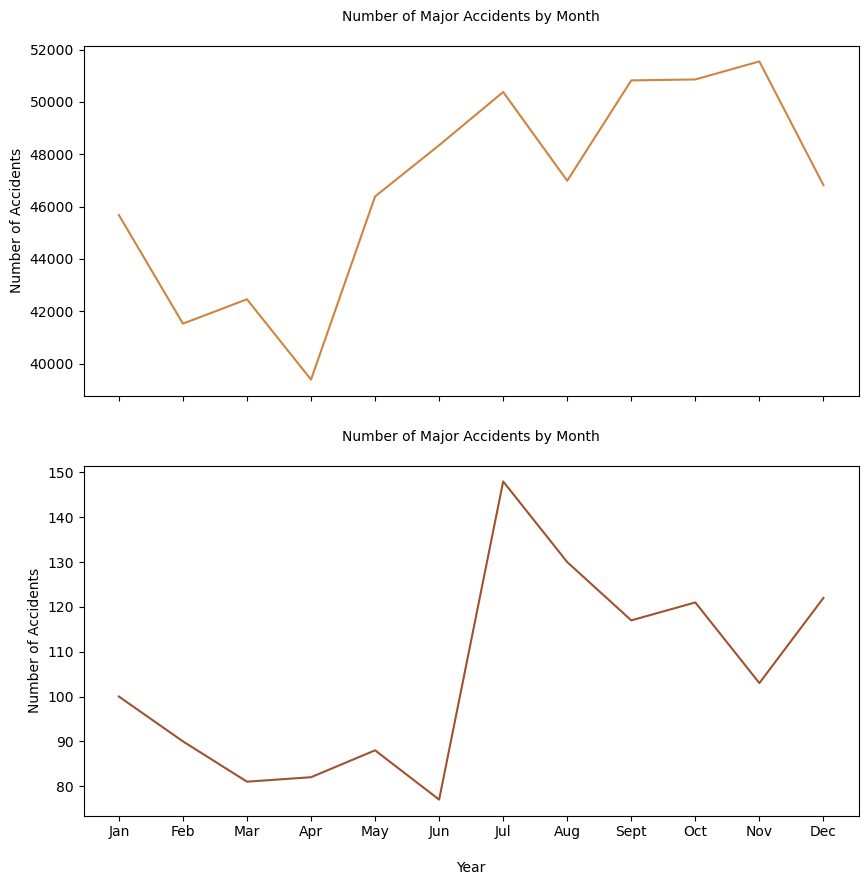

In [19]:
form=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sept','Oct','Nov','Dec']
fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(10,10), sharex=True)

accidents_nonmajor_monthly=accidents_nonmajor['month'].value_counts().reindex(form)
accidents_major_monthly=accidents_major['month'].value_counts().reindex(form)


# plot
ax1.plot(accidents_nonmajor_monthly.index, accidents_nonmajor_monthly.values, color='peru')
ax2.plot(accidents_major_monthly.index, accidents_major_monthly.values, color='sienna')
ax1.set_title('Number of Major Accidents by Month\n', fontsize=10)
ax2.set_title('Number of Major Accidents by Month\n', fontsize=10)
ax1.set(ylabel='Number of Accidents')
ax2.set(ylabel='Number of Accidents')
ax2.set(xlabel='\nYear')

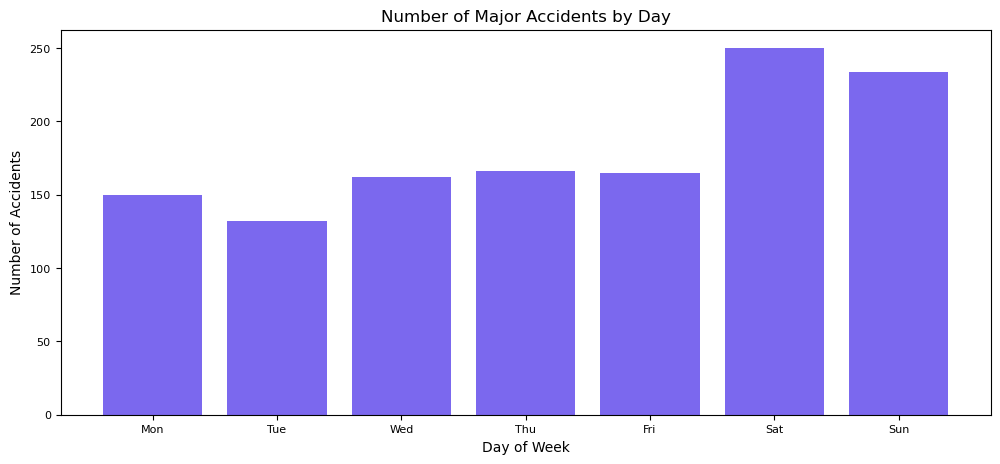

In [16]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
accidents_major_daily = accidents_major['day_of_week'].value_counts().reindex(order)

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(accidents_major_daily.index, accidents_major_daily.values, color='mediumslateblue')
ax.set_title('Number of Major Accidents by Day', fontsize=12)
ax.set_xlabel('Day of Week', fontsize=10)
ax.set_ylabel('Number of Accidents', fontsize=10)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.show()

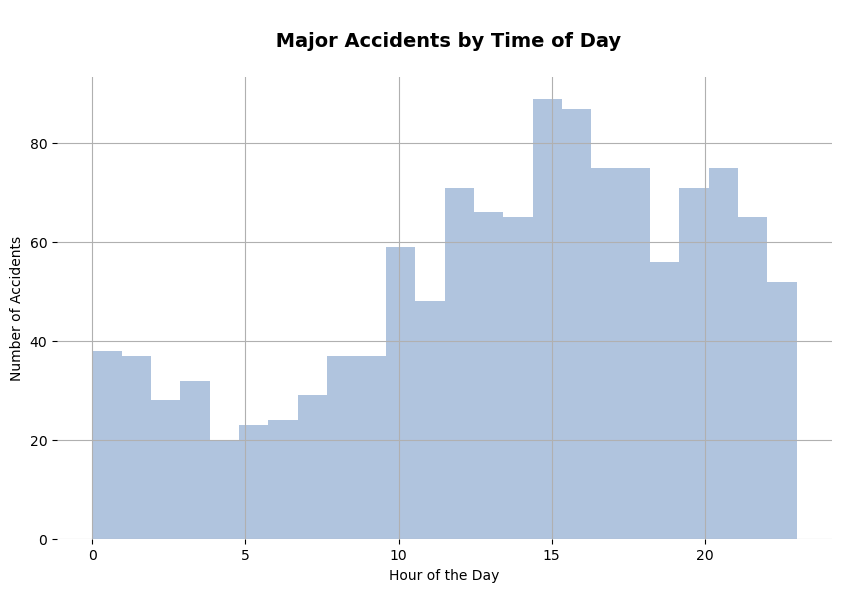

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
day=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
# plot
accidents_major['time'].hist(bins=24,color='lightsteelblue')
ax.set_title('\n Major Accidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')
# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [20]:
accidents_1.groupby('incident_type')['number_of_vehicles','number_of_casualties'].mean()

/var/folders/mv/2r7940dx1xq7bhnl13rb8k2r0000gn/T/ipykernel_7204/2829957760.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  accidents_1.groupby('incident_type')['number_of_vehicles','number_of_casualties'].mean()


,number_of_vehicles,number_of_casualties
incident_type,,
major,2.331215,3.925338
non-major,1.840050,1.289424


In [21]:
road_conditions_counts = accidents_major['road_type'].value_counts()
junction_detail_counts = accidents_major['junction_detail'].value_counts()
accidents_weather_counts = accidents_major['weather_conditions'].value_counts()
accidents_light_conditions_counts = accidents_major['light_conditions'].value_counts()
accidents_pedestrian_crossing_physical_facilities_counts = accidents_major['pedestrian_crossing_physical_facilities'].value_counts()
accidents_urban_or_rural_area_counts = accidents_major['urban_or_rural_area'].value_counts()
accidents_carriageway_hazards_counts = accidents_major['carriageway_hazards'].value_counts()

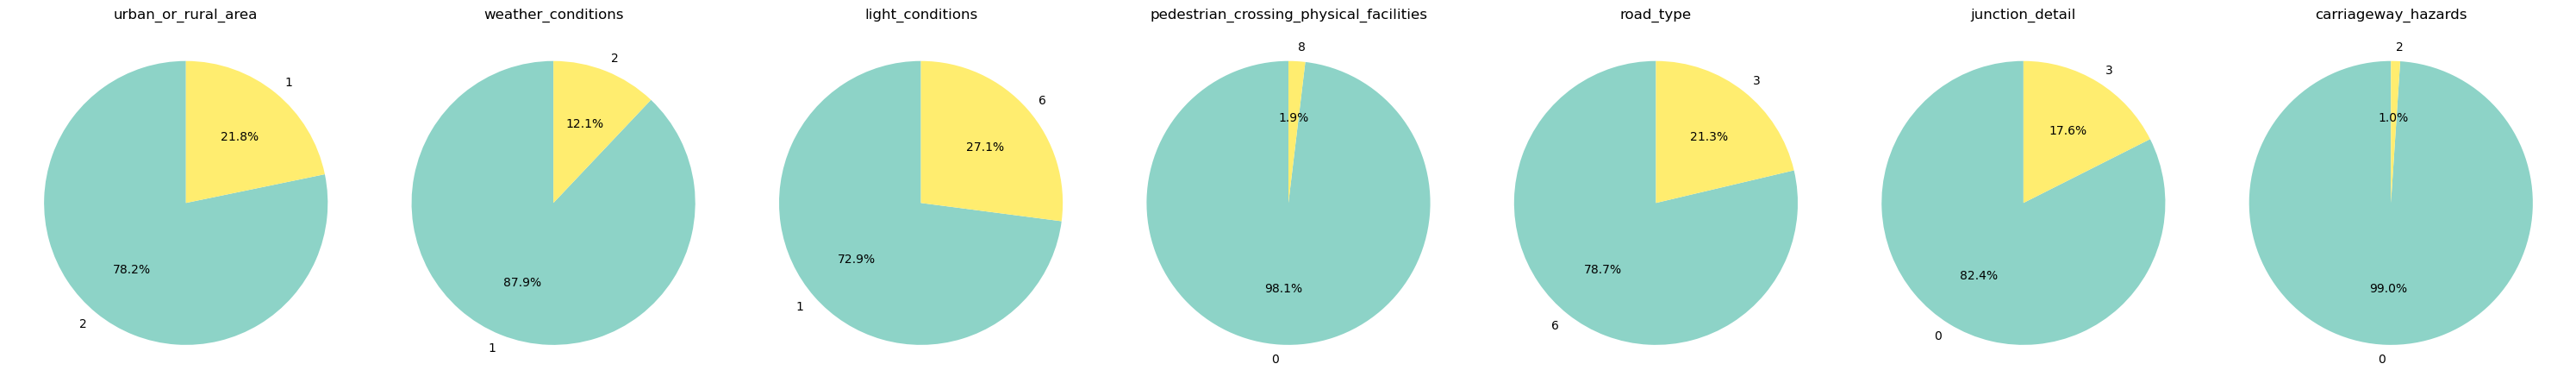

In [22]:
# Define the columns you want to create pie charts for
columns_to_plot = ['urban_or_rural_area', 'weather_conditions', 'light_conditions', 'pedestrian_crossing_physical_facilities', 'road_type', 'junction_detail', 'carriageway_hazards']

# Create a figure with subplots
num_rows = 1
num_cols = len(columns_to_plot)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Define a color palette (you can customize this)
color_palette = plt.cm.get_cmap('Set3', 8)  # You can choose a different colormap and number of colors

# Loop through columns and create pie charts
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    
    # Calculate the top 5 value types with the highest accidents
    top_5_values = accidents_major[column].value_counts().nlargest(2)
    
    # Create a DataFrame with the top 5 values and their counts
    top_5_df = pd.DataFrame({'count': top_5_values.values}, index=top_5_values.index)
    
    # Define colors for the pie chart
    colors = [color_palette(i) for i in np.linspace(0, 1, len(top_5_df))]
    
    # Plot the pie chart with custom colors
    ax.pie(top_5_df['count'], labels=top_5_df.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(column)

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

# Key Insights

Our analysis of the accidents dataset reveals a decline in the number of major accidents from 2017 to 2020. However, it's essential to interpret this trend cautiously, considering the unique circumstances of 2020, which was heavily impacted by the COVID-19 pandemic and subsequent lockdowns, resulting in reduced typical rush-hour traffic. Despite this, the decrease in major accidents during this period has been relatively modest. This suggests that addressing the issue of major accidents remains a significant concern that warrants attention and proactive measures.

From the deep dive analysis we can extract the following insights about major accidents:

1) Major accidents exhibit an ascending trajectory beginning in June, reaching a peak in July. Monthly trend analysis indicates that accidents are most prevalent in the summer months of June, July, and August. This can be attributed to the global phenomenon of increased vehicular activity during the summer season. Furthermore, a report from GOV.UK underscores that the summer months witness a higher influx of teenagers taking to the roads for driving compared to any other time of the year.

2) Major accidents rise as the day progresses with the highest of number of accidents occuring between 3pm and 9pm. Also, highest number(about half) of major accidents occur over the weekend especially Saturdays and Sundays.

3) Surprisingly, the data from the pie chart reveals a counterintuitive pattern: nearly 90% of major accidents transpire under normal weather conditions, with approximately 73% transpiring during normal light conditions. Another intriguing observation emerges from this data, indicating that roughly 80% of major accidents take place in rural areas, and the vast majority of these incidents occur on single carriageways. While these two metrics warrant deeper exploration, they lie beyond the scope of this dataset analysis.     

# Recommendations

1) Improving rural policing and promoting public transport in rural areas could be effective strategies for reducing major accidents.

2) Single carriageways, characterized by undivided traffic flow in both directions, warrant attention in terms of infrastructure enhancement and the implementation of stringent speed limits. These measures can contribute significantly to accident prevention. 

3) Enhancing the accessibility of public transport, especially on popular recreational routes frequented during weekends, holds the potential to yield substantial benefits in accident mitigation.

# Conclusion and Future Scope

The aim of this analysis was to gain insights into the essential aspects of major accidents and inspire further inquiry. These insights illuminate several promising paths for future analysis:  

1) Investigating the role of internal factors such as alcohol consumption, speeding, and other human-related factors as contributors to major accidents. 

2) Examining whether workplace fatigue and the timing of rush hours emerge as the most influential factors in predicting both fatal traffic accidents and general accidents. 

3) Assessing the potential impact of reducing speed limits, particularly in rural areas, or converting single carriageways into dual carriageways, as strategies to reduce fatal traffic accidents.